1.Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

2.Dataset

In [42]:
df = pd.read_csv('Wine.csv')

In [43]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [44]:
 df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

3.Train Test Split

In [45]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

4.Feature Scaling

In [46]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

4.PCA Model

In [47]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaler)
x_test_pca = pca.transform(x_test_scaler)

In [48]:
variance =  pca.explained_variance_ratio_

In [49]:
variance

array([0.35900066, 0.18691934])

5.Logistic Model

In [63]:
le = LogisticRegression()
le.fit(x_train_pca,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

6.Prediction

In [67]:
y_pred = le.predict(x_test_pca)

7.Evaluation

In [68]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

Accuracy Score: 1.0
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


<Axes: >

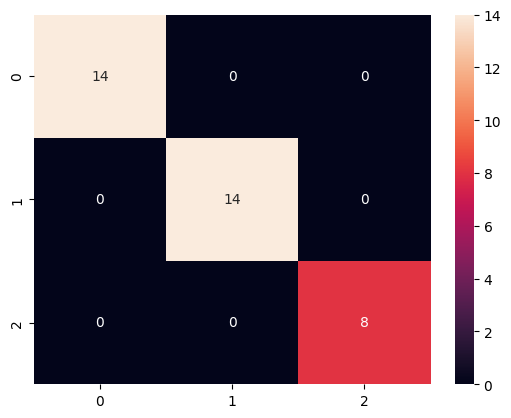

In [69]:
sns.heatmap(cm, annot=True)

C:\Users\Deepika\AppData\Local\Temp\ipykernel_13592\375353261.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


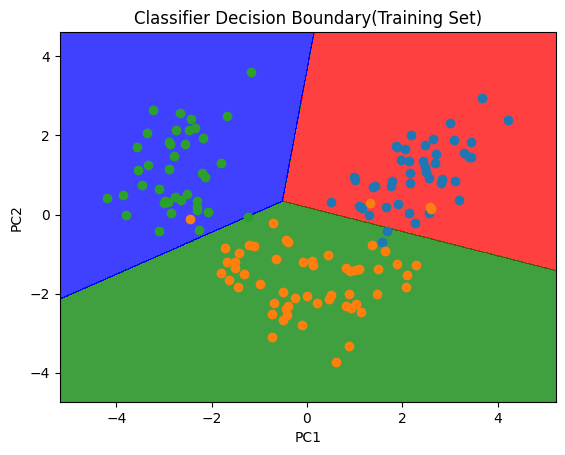

In [74]:
x_set,y_set = x_train_pca,y_train
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                   np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(
    x1, x2,
    le.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green', 'blue'))
)
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
#Plot Traing Points
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j,0],
        x_set[y_set == j,1],
        cmap = ListedColormap(('red','green','blue'))(i),
        label=j
    )
plt.title("Classifier Decision Boundary(Training Set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()